![]("download.webp"")

## Day Agenda
- Unsupervised machine learning
- Types of Unsupervised machine learning
- Appliocations of UnUnsupervised machine learning
- K-means Clustering


## Unsupervised machine learning
> Unsupervised machine learning is a type of  ML in which models are 
 trained using unlabeled data by with out any supervision.
-  To find out hidden patterns,insights from given data.

## Types of Unsupervised machine learning
- 2 Unsupervised machine learning
1. Clustering
    - grouping the object into clusters
    - objects have most similarities it will group them into one cluster
    - objects have less similarities it will group them into another cluster

2. Association
    - To findout Relationship between variables in the large database.

## Different  UnSupervisied Machine Learning Algorithems
- k-MeansClustering
- Hieararichal Clustering
- Anomaly Detection
- Neural Networks
- Principle Component Analysis
- Independent Component Analysis
- Apriori Algorithem
- Singular Value Decomposition

## Appliocations of UnUnsupervised machine learning
- Stock Market Exchange 
- Image Processing
- Nureal Netwoks
- Data Recomands

## K-means Clustering
> k- means Clustering is a method of Vector Quntization,originally from Signal Processing
>> It Aims to Partition the data into no of K clusters based calculation of mean of datapoint
- centroid
- Inertia
- Eclidean Distan
- Elbow Method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#dir(pd)

## Read the data
- pandas.read_csv
- pandas.read_json

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Machine-Learning-Online2021-22-QICET/main/Day8-29-06-2021/income.csv")
df.head() # 5 rows from the datset

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [7]:
df.shape

(22, 3)

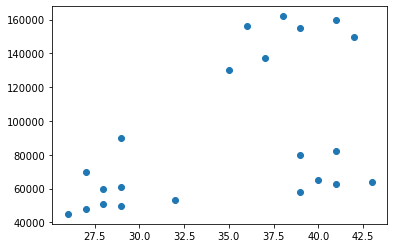

In [8]:
plt.scatter(df['Age'],df['Income($)'])

In [9]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=3)

In [10]:
y_pred=k.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [11]:
df['cluster']=y_pred

In [12]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [13]:
k.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

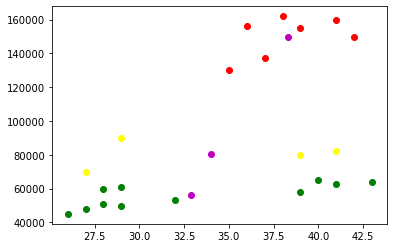

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='m',marker='o')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')


In [15]:
## Preprocessing
#Minmax scaller
#- [0,1] or [-1,1]
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
df['Age']=m.fit_transform(df[["Age"]])
df['Income($)']=m.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [16]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=3)

In [17]:
y_pred=k.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


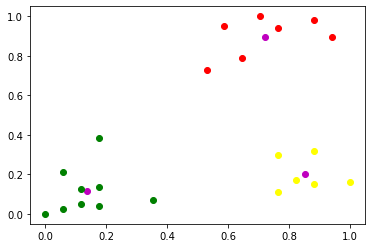

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='m',marker='o')
plt.scatter(df1['Age'],df1['Income($)'],color='red' ,label='0 clustter')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')


In [20]:
k.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [21]:
sse=[]
k=range(1,10)
for i in k:
    K1=KMeans(n_clusters=i)
    K1.fit(df[['Age','Income($)']])
    sse.append(K1.inertia_)

In [22]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.2187801089333045,
 0.17796706251738348,
 0.13762504146528043,
 0.10188787724979426]

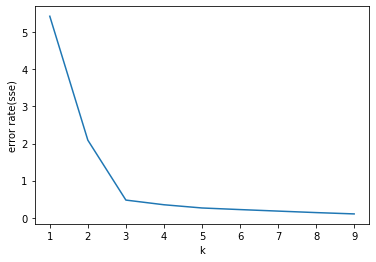

In [23]:
plt.xlabel("k")
plt.ylabel("error rate(sse)")
plt.plot(k,sse)